In [1]:
from sympy.physics.optics import RayTransferMatrix, ThinLens, BeamParameter
from sympy import symbols, init_printing, pi, sqrt, pprint, solveset, S
from scipy.constants import c
import matplotlib.pyplot as plt
import numpy as np
init_printing()

from ipywidgets.widgets import IntSlider, FloatLogSlider, FloatSlider, interactive_output, FloatRangeSlider
from IPython.display import display

For frequency: 300 GHz = 0.10 cm
w0: 0.2 cm
Z_r: 1.26 cm



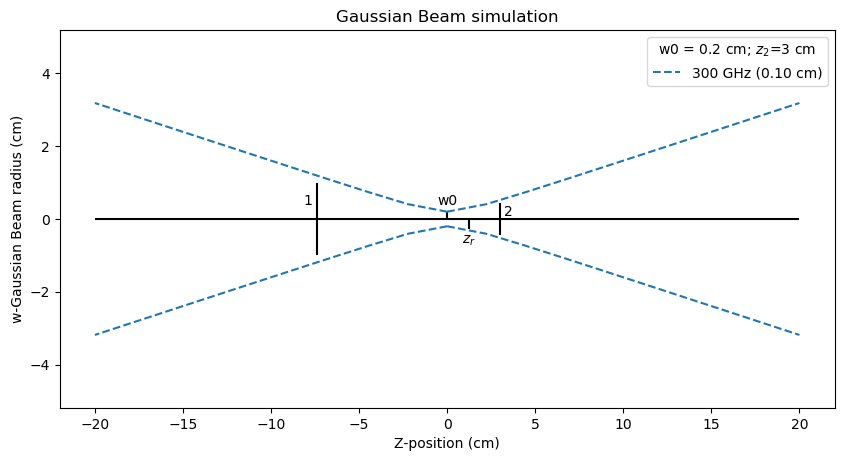

In [239]:
f1, f2, f3, r1, r2 = symbols('f1, f2, f3, r1, r2') # waist distances in cm
w1, w2, w3, w4 = symbols('w1, w2, w3, w4', positive=True) # waist radius in cm

w, lam, w0, z =symbols('w, lam, w0, z', positive=True)

z_r = pi*w0**2/lam
R = z(1+(z_r/z)**2)
w = w0*sqrt(1+(z/z_r)**2)

w_z_r = lambda w0: np.sqrt(2)*w0
ghz_cm = lambda x: c*1e2/x*1e-9

def gaussian_beam(w0_, z_, l=400):
    
    beam = []
    for i in z_:
        temp = float(w.subs({w0:w0_, lam:ghz_cm(l), z:i}).evalf())
        beam.append(temp)
        
    return np.array(beam)

def beam_plot(ax, color='C0', lam=400):
    ax.plot(z_, beam, f'--{color}', label = f'{lam} GHz ({ghz_cm(lam):.2f} cm)')
    ax.plot(-z_, -beam, f'--{color}')
    ax.plot(-z_, beam, f'--{color}')
    ax.plot(z_, -beam, f'--{color}')
    
z_ = np.linspace(0, 20, 10)
w0_ = 0.2
l = 300

z_r_ = float(z_r.subs({w0:w0_, lam:ghz_cm(l)}).evalf())
beam = gaussian_beam(w0_, z_, l)

fig0, ax0 = plt.subplots(figsize=(10, 5), dpi=100)
ax0.hlines(0, xmin=-z_.max(), xmax=z_.max())

print(f'For frequency: {l} GHz = {ghz_cm(l):.2f} cm\nw0: {w0_} cm\nZ_r: {z_r_:.2f} cm\n')

beam_plot(ax0, color='C0', lam=l)

ax0.set_ylim(-beam.max()-2, beam.max()+2)
ax0.set_xlabel('Z-position (cm)')
ax0.set_ylabel('w-Gaussian Beam radius (cm)')
ax0.set_title('Gaussian Beam simulation')

# Annotate beam waist
ax0.vlines(x=0, ymin=0, ymax=w0_)
plt.annotate(
    s='w0', 
    xy=(0, 0), 
    xytext=(0, 0.5),
    ha='center',
    va='center'
)

# Annotate confocal length
z_r_y = w_z_r(w0_)
ax0.vlines(x=z_r_, ymin=0, ymax=-z_r_y)
plt.annotate(
    s=f'$z_r$', 
    xy=(z_r_, 0), 
    xytext=(z_r_, -0.6),
    ha='center',
    va='center'
)

# Annotate Entry1
z_entry1 = -7.4
ax0.vlines(x=z_entry1, ymin=-1, ymax=1)

plt.annotate(
    s='1', 
    xy=(z_entry1, 0), 
    xytext=(z_entry1-0.5, 0.5), 
    ha='center',
    va='center'
)

# Annotate Entry2
z_entry2 = 3
ax0.vlines(x=z_entry2, ymin=-0.43, ymax=0.43)

plt.annotate(
    s='2', 
    xy=(z_entry2, 0), 
    xytext=(z_entry2+0.5, 0.2), 
    ha='center',
    va='center'
)

###############

plt.legend(title=f'w0 = {w0_} cm; $z_2$={z_entry2} cm')
plt.show()
plt.close()

In [242]:
def w_func(W, L, Z):
    W = np.linspace(*W, 20)
    y = []
    for i in W:
        temp = float(w.subs({w0:i, lam:ghz_cm(L), z:Z}).evalf(4))
        y.append(temp)
    fig, ax = plt.subplots(figsize=(10,5))
    l, = ax.plot(W, y, '.', label=f'z: {Z} cm, lambda: {L} GHz')
    
   
    w0_, w_in2 = l.get_data()
    print(f'Checking: w0: \n{w0_}\nw_in2: \n{w_in2}\n')
    
    ind = np.argwhere(np.logical_and(w_in2<=0.43, w_in2>0.37))
    
    if w_in2.min()<=0.43:
        w_in1 = []
        for i in w0_[ind]:
            temp = float(w.subs({w0:i, lam:ghz_cm(L), z:(10.4-Z)}).evalf(4))
            w_in1.append(temp)
        w_in1 = np.array(w_in1)
        
        print(f'w0: {w0_[ind].reshape(len(ind))}\nw_in1: {w_in1}\nw_in2: {w_in2[ind].reshape(len(ind))}\n')
        
        ax.plot(w0_[ind], w_in1, 'x', label = f'w_in1: z = {(10.4-Z):.2f} cm from w4')
        
        print('Filtering by w_in1 min=0.3 and max=0.97\n')
        #ind2 = np.argwhere(np.logical_or(w_in1.max()<=0.97, w_in1.max()>=0.3))
        #print(f'ind2: {ind2}')
        ind2 = -1
        print(f'w0:{w0_[ind][ind2]}\n(w_in1, w_in2): ({w_in1[ind2]}, {w_in2[ind][ind2]})')
    
    else: print(f'w_in2 minimum reached: {w_in2.min()}\n')
        
    ax.set_xlabel('w0-Beam waist radius at z=0')
    ax.set_ylabel(f'w_in2 - z: {Z} cm from w4')
    ax.legend()
    ax.grid()
    
W = FloatRangeSlider(
    value=[0.1, 0.5],
    min=0.1,
    max=1,
    step=0.01,
    description='w0:',
)
L = FloatSlider(min=70, max=1000, value=400, step=1, description='GHz')
Z = FloatSlider(min=0, max=10, value=3, step=0.001, description='z:')

out = interactive_output(w_func, {'W':W, 'L':L, 'Z':Z})
display(W, L, Z, out)

FloatRangeSlider(value=(0.1, 0.5), description='w0:', max=1.0, min=0.1, step=0.01)

FloatSlider(value=400.0, description='GHz', max=1000.0, min=70.0, step=1.0)

FloatSlider(value=3.0, description='z:', max=10.0, step=0.001)

Output()